# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

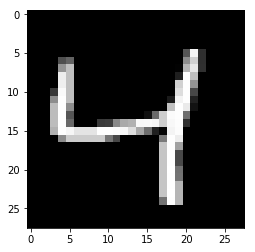

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=(None, image_size), name="inputs")
targets_ = tf.placeholder(tf.float32, shape=(None, image_size), name="targets")

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size)

# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name="output")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6945
Epoch: 1/20... Training loss: 0.6915
Epoch: 1/20... Training loss: 0.6885
Epoch: 1/20... Training loss: 0.6853
Epoch: 1/20... Training loss: 0.6811
Epoch: 1/20... Training loss: 0.6757
Epoch: 1/20... Training loss: 0.6706
Epoch: 1/20... Training loss: 0.6630
Epoch: 1/20... Training loss: 0.6541
Epoch: 1/20... Training loss: 0.6445
Epoch: 1/20... Training loss: 0.6334
Epoch: 1/20... Training loss: 0.6210
Epoch: 1/20... Training loss: 0.6056
Epoch: 1/20... Training loss: 0.5927
Epoch: 1/20... Training loss: 0.5773
Epoch: 1/20... Training loss: 0.5566
Epoch: 1/20... Training loss: 0.5405
Epoch: 1/20... Training loss: 0.5196
Epoch: 1/20... Training loss: 0.5071
Epoch: 1/20... Training loss: 0.4901
Epoch: 1/20... Training loss: 0.4726
Epoch: 1/20... Training loss: 0.4507
Epoch: 1/20... Training loss: 0.4361
Epoch: 1/20... Training loss: 0.4227
Epoch: 1/20... Training loss: 0.4105
Epoch: 1/20... Training loss: 0.3955
Epoch: 1/20... Training loss: 0.3848
E

Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1782
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1797
Epoch: 1/20... Training loss: 0.1870
Epoch: 1/20... Training loss: 0.1868
Epoch: 1/20... Training loss: 0.1893
Epoch: 1/20... Training loss: 0.1841
Epoch: 1/20... Training loss: 0.1840
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1860
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1905
Epoch: 1/20... Training loss: 0.1838
Epoch: 1/20... Training loss: 0.1908
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1801
Epoch: 1/20... Training loss: 0.1868
Epoch: 1/20... Training loss: 0.1829
Epoch: 1/20... Training loss: 0.1821
Epoch: 1/20... Training loss: 0.1762
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1835
Epoch: 1/20... Training loss: 0.1835
Epoch: 1/20... Training loss: 0.1850
E

Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1601
Epoch: 2/20... Training loss: 0.1459
Epoch: 2/20... Training loss: 0.1489
Epoch: 2/20... Training loss: 0.1505
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1504
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1524
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1490
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1550
E

Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1316
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1321
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1419
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1342
E

Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1272
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1284
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1289
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1224
E

Epoch: 5/20... Training loss: 0.1172
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1181
Epoch: 5/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1199
Epoch: 5/20... Training loss: 0.1180
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1180
Epoch: 5/20... Training loss: 0.1163
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1156
E

Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1053
Epoch: 5/20... Training loss: 0.1057
Epoch: 5/20... Training loss: 0.1055
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1028
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1050
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1073
E

Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1014
Epoch: 6/20... Training loss: 0.0998
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1014
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1091
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.0996
Epoch: 6/20... Training loss: 0.0998
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1015
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1078
E

Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.0966
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.0988
E

Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0941
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0974
E

Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0930
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.1006
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.1013
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0989
E

Epoch: 9/20... Training loss: 0.0929
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0921
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0928
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0926
Epoch: 9/20... Training loss: 0.0924
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0958
E

Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0918
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.1014
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.1015
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0906
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0995
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0904
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0907
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0986
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0888
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0900
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0988
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0903
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0980
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0903
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0880
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0996
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0890
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0900
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0900
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0898
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0892
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0981
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0977
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0970
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0993
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0981
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0971
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0879
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [ ]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.